In [1]:
#pip install python-utils

In [2]:
#pip install utils

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

#from utils import decorate, savefig

np.random.seed(17)

from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

In [4]:
# The following function reads a file with one edge per line, specified by two integer node IDs.

def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [5]:
## We'll read the Facebook data downloaded from SNAP
# https://snap.stanford.edu/data/facebook_combined.txt.gZ

fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
n, m

(4039, 88234)

In [6]:
# With large graphs, it takes too long to compute clustering coefficients and path lengths,
# but we can estimate them by sampling. NetworkX provides a function in its approximation module
# that estimates the clustering coefficient:

from networkx.algorithms.approximation import average_clustering

In [7]:
C = average_clustering(fb, trials=1000)# ak stavis (G, trials=1000) kao sto je u knjigi, ne funkcionera
C

0.609

In [8]:
# Function that estimates the average path length

def sample_path_lengths(G, nodes=None, trials=1000):
    """Choose random pairs of nodes and compute the path length between them.
    
    G: Graph
    nodes: list of nodes to choose from
    trials: number of pairs to choose
    
    returns: list of path lengths
    """
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
    
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair)
              for pair in pairs]
    return lengths

def estimate_path_length(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

In [9]:
L = estimate_path_length(fb)
L

3.717

In [10]:
# Next I'll construct a WS graph with the same number of nodes and average degree as the Facebook network:

n = len(fb)
m = len(fb.edges())
k = int(round(2*m/n))
k

44

In [11]:
# With p=0 we get a ring lattice.
# The number of edges is a little bigger than in the dataset because we have to round k to an integer.

lattice = nx.watts_strogatz_graph(n, k, p=0)
len(lattice), len(lattice.edges())

(4039, 88858)

In [12]:
C, average_clustering(lattice)

(0.609, 0.742)

In [13]:
L, estimate_path_length(lattice)

(3.717, 47.088)

In [14]:
# With p=1 we get a random graph.

random_graph = nx.watts_strogatz_graph(n, k, p=1)

In [15]:
C, average_clustering(random_graph)

(0.609, 0.01)

In [16]:
L, estimate_path_length(random_graph)

(3.717, 2.613)

In [17]:
ws = nx.watts_strogatz_graph(n, k, 0.05, seed=15)

In [18]:
C, average_clustering(ws)

(0.609, 0.605)

In [19]:
L, estimate_path_length(ws)

(3.717, 3.264)

In [20]:
def degrees(G):
    """List of degrees for nodes in 'G'.
    G: Graph object
    returns: list of int
    """
    return[G.degree(u) for u in G]

In [21]:
np.mean(degrees(fb)), np.mean(degrees(ws))

(43.69101262688784, 44.0)

In [22]:
np.std(degrees(fb)), np.std(degrees(ws))

(52.41411556737521, 1.4309215628189869)

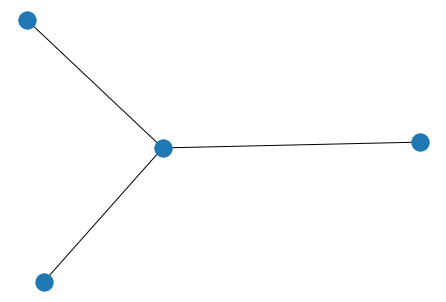

In [23]:
G = nx.Graph()
G.add_edge(1, 0)
G.add_edge(2, 0)
G.add_edge(3, 0)
nx.draw(G)

In [24]:
degrees(G)

[1, 3, 1, 1]

In [25]:
#conda install -c conda-forge empyrical-dist

In [26]:
#conda update -n base -c defaults conda

In [27]:
#pip install empiricaldist

In [28]:
from empiricaldist import Pmf

In [29]:
# A Pmf object maps from each degree to the fraction of nodes with that degree.
pmf = Pmf.from_seq(degrees(G))
pmf

,probs
1,0.75
3,0.25


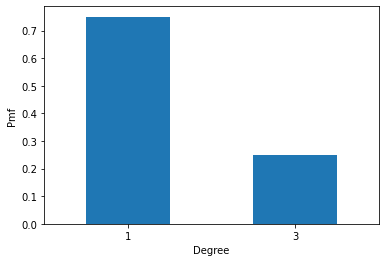

In [30]:
# 75% of the nodes have degreee 1; 25% have degree 3.
# We can visualize the distributtion as a histogram:

pmf.bar(xlabel='Degree', ylabel='Pmf')

In [31]:
pmf_fb = Pmf.from_seq(degrees(fb))
pmf_fb.mean(), pmf_fb.std()

(43.69101262688785, 52.41411556737521)

In [32]:
pmf_ws = Pmf.from_seq(degrees(ws))
pmf_ws.mean(), pmf_ws.std()

(44.00000000000001, 1.4309215628189869)

In [33]:
pmf_fb(1), pmf_ws(1)

(0.018568952711067097, 0)

<AxesSubplot:xlabel='Degree'>

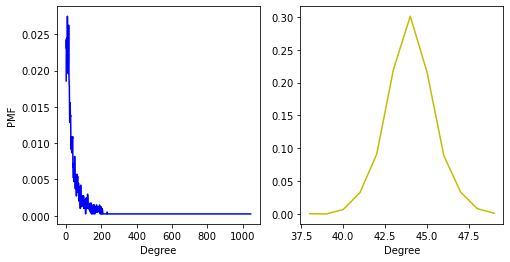

In [34]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
pmf_fb.plot(label='Facebook', color='b', xlabel='Degree', ylabel='PMF')

plt.subplot(1,2,2)
pmf_ws.plot(label='WS graph', color='y',xlabel='Degree')

<AxesSubplot:xlabel='Degree'>

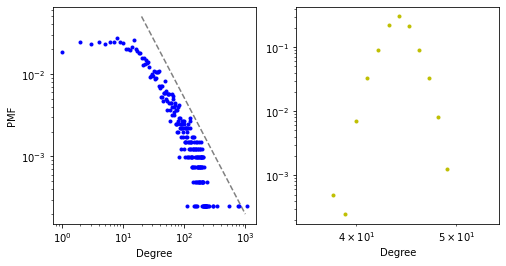

In [35]:
plt.figure(figsize=(8,4))
options = dict(ls='', marker='.')

plt.subplot(1,2,1)
plt.plot([20, 1000], [5e-2, 2e-4], color='gray', linestyle='dashed')
plt.xscale('log')
plt.yscale('log')

pmf_fb.plot(label='Facebook', color='b', **options, xlabel='Degree', ylabel='PMF')

plt.subplot(1,2,2)
plt.xscale('log')
plt.yscale('log')

pmf_ws.plot(label='WS graph', color='y', **options, xlim=[35, 55], xlabel='Degree')

In [36]:
ba = nx.barabasi_albert_graph(n=4039, m=22)

In [37]:
#nx.barabasi_albert_graph??

In [38]:
pmf_ba = Pmf.from_seq(degrees(ba))
pmf_ba.mean(), pmf_ba.std()

(43.76033671700915, 40.50881510851596)

<AxesSubplot:xlabel='Degree'>

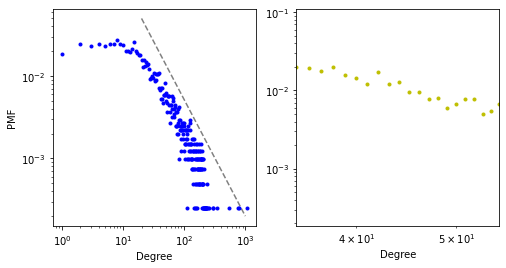

In [39]:
plt.figure(figsize=(8,4))
options = dict(ls='', marker='.')

plt.subplot(1,2,1)
plt.plot([20, 1000], [5e-2, 2e-4], color='gray', linestyle='dashed')
plt.xscale('log')
plt.yscale('log')

pmf_fb.plot(label='Facebook', color='b', **options, xlabel='Degree', ylabel='PMF')

plt.subplot(1,2,2)
plt.xscale('log')
plt.yscale('log')

pmf_ba.plot(label='BA graph', color='y', **options, xlim=[35, 55], xlabel='Degree')

In [40]:
import random

In [72]:
# modified version of the NetworkX implementation from
# https://github.com/networkx/networkx/blob/master/networkx/generators/random_graphs.py

def barabasi_albert_graph(n, k, seed=None):
    """Constructs a BA graph.
    n: number of nodes
    k: number of edges for each new node
    seed: random seen
    """
    if seed is not None:
        random.seed(seed)
    
    G = nx.empty_graph(k)
    targets = set(range(k))
    repeated_nodes = []
    
    for source in range(k, n):
        
        G.add_edges_from(zip([source]*k, targets))
        
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * k)
        
        targets = _random_subset(repeated_nodes, k)
        
    return G

In [73]:
# And here's the function that generates a random subset without repetition.

def _random_subset(repeated_nodes, k):
    """Select a random subset of nodes without repeating.
    
    repeated_nodes: list of nodes
    k: size of set
    
    returns: set of nodes
    """
    targets = set()
    while len(targets) < k:
        x = random.choice(repeated_nodes)
        targets.add(x)
    return targets

In [74]:
# I'll generate a BA graph with the same number of nodes and edges as the Facebook data:

n = len(fb)
m = len(fb.edges())
k = int(round(m/n))
n, m, k

(4039, 88234, 22)

In [75]:
# Providing a random seed means we'll get the same graph every time.
ba = barabasi_albert_graph(n, k, seed=15)

In [76]:
# The number of edges is pretty close to what we asked for.

len(ba), len(ba.edges()), len(ba.edges())/len(ba)

(4039, 88374, 21.88016835850458)

In [77]:
# So the mean degree is about right.
np.mean(degrees(fb)), np.mean(degrees(ba))

(43.69101262688784, 43.76033671700916)

In [78]:
# The standard deviation of degree is pretty close, and much better than the WS model.
np.std(degrees(fb)), np.std(degrees(ba))

(52.41411556737521, 41.03760075705614)

In [79]:
# Let's take a look at the degree distribution.
pmf_ba = Pmf.from_seq(degrees(ba))

In [80]:
# Looking at the PMFs on a linear scale, we see one difference,
# which is that the BA model has no nodes with degree less than k, which is 22.

<AxesSubplot:xlabel='Degree'>

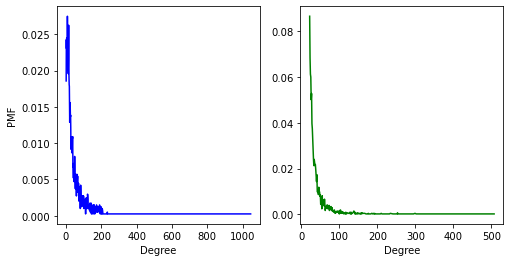

In [81]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
pmf_fb.plot(label='Facebook', color='b', xlabel='Degree', ylabel='PMF')

plt.subplot(1,2,2)
pmf_ba.plot(label='BA graph', color='g', xlabel='Degree')

In [82]:
# But if we look at the PMF on a log-log scale, the BA model looks pretty good for values bigger than about 20.
# And it seems to follow a power law.

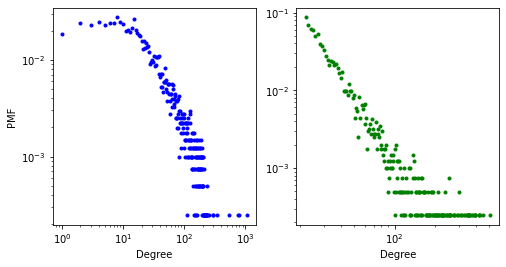

In [83]:
plt.figure(figsize=(8,4))
options = dict(ls='', marker='.')

plt.subplot(1,2,1)

pmf_fb.plot(label='Facebook', color='b', **options, xlabel='Degree', ylabel='PMF')
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,2,2)

pmf_ba.plot(label='BA model', color='g', **options, xlabel='Degree')
plt.xlim=[1, 1e4]
plt.xscale('log')
plt.yscale('log')

In [84]:
# The characteristic path length is even smaller in the model than in the data.

L, estimate_path_length(ba)

(3.717, 2.513)

In [85]:
# But the clustering coefficient isn't even close.

C, average_clustering(ba)

(0.609, 0.048)

In [86]:
# In the BA model, the degree distribution is better than in the WS model, but the clustering coefficient is too low.

In [87]:
# Cumulative distributions are a better way to visualize distributions.

def cumulative_prob(pmf, x):
    """Computes the cumulative probability of 'x'.
    
    Total probability of all values <= x.
    
    returns: float probability
    """
    ps = [pmf[value] for value in pmf.qs if value<=x]
    return np.sum(ps)

In [88]:
# The total probability for all values up to and including 11 is 0.258, so the 25th percentile is about 11.
cumulative_prob(pmf_fb, 11)

0.2577370636296113

In [89]:
# The median degree is about 25.
cumulative_prob(pmf_fb, 25)

0.5060658578856152

In [90]:
# And the 75th percentile is about 57. That is, about 75% of users have 57 friends or fewer.
cumulative_prob(pmf_fb, 57)

0.751671205743996

In [91]:
# empiricaldist provides Cdf, which computes cumulative distribution functions.
from empiricaldist import Cdf

In [92]:
# Here are the degree CDFs for the Facebook data, the WS model, and the BA model.
cdf_fb = Cdf.from_seq(degrees(fb), name='Facebook')
cdf_ws = Cdf.from_seq(degrees(ws), name='WS model')
cdf_ba = Cdf.from_seq(degrees(ba), name='BA model')

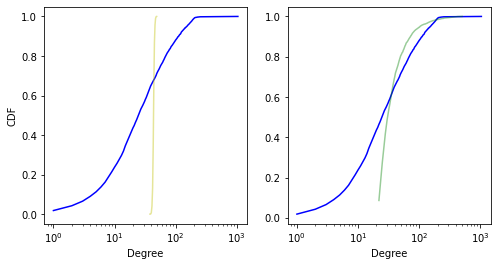

In [93]:
# If we plot them on a log-x scale, we get a sense of how well the models fit the central part of the distribution.
# The WS model is hopeless. The BA model is of for values above the median, but not very good for smaller values.

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
cdf_fb.plot(color='b')
cdf_ws.plot(color='y', alpha=0.4, xlabel='Degree', ylabel='CDF')
plt.xscale('log')

plt.subplot(1,2,2)
cdf_fb.plot(color='b', label='Facebook')
cdf_ba.plot(color='g', alpha=0.4, xlabel='Degree')
plt.xscale('log')

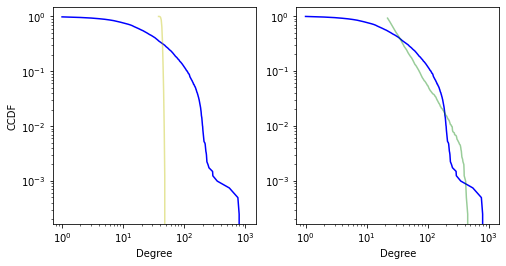

In [95]:
# On a log-log scale, we see that the BA model fits the tail of the distribution reasonably well.

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
(1 - cdf_fb).plot(color='b')
(1 - cdf_ws).plot(color='y', alpha=0.4, xlabel='Degree', ylabel='CCDF')
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,2,2)
(1 - cdf_fb).plot(color='b', label='Facebook')
(1 - cdf_ba).plot(color='g', alpha=0.4, xlabel='Degree')
plt.xscale('log')
plt.yscale('log')

In [96]:
# EXERCISES

In [97]:
# Exercise 4.2

In [98]:
# Here are the parameters of the Facebook data

n = len(fb)
m = len(fb.edges())
k = int(round(m/n))
n, m, k

(4039, 88234, 22)

In [100]:
# Now we can make an HK graph with these parameters, and with the target clustering as high as possible.

hk = nx.powerlaw_cluster_graph(n, k, 1.0, seed=15)
len(hk), len(hk.edges())

(4039, 88363)

In [101]:
# The average clustering is much higher than in the BA model, but still not as high as in the data.

C, average_clustering(hk)

(0.609, 0.263)

In [102]:
# The average path length is even lower than in the data.

L, estimate_path_length(hk)

(3.717, 2.751)

In [103]:
# The mean degree is about right.

np.mean(degrees(fb)), np.mean(degrees(hk))

(43.69101262688784, 43.75488982421391)

In [104]:
# The standard deviation of degree is a little low.

np.std(degrees(fb)), np.std(degrees(hk))

(52.41411556737521, 43.106377456263075)

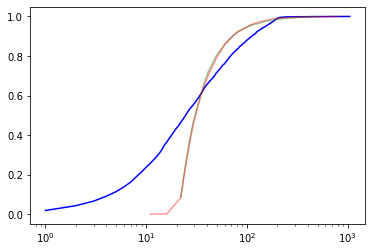

In [105]:
# The degree distribution is almost identical to the BA model

cdf_hk = Cdf.from_seq(degrees(hk), name='HK model')
cdf_fb.plot(color='b')
cdf_ba.plot(color='g', alpha=0.4)
cdf_hk.plot(color='r', alpha=0.4)
plt.xscale('log')

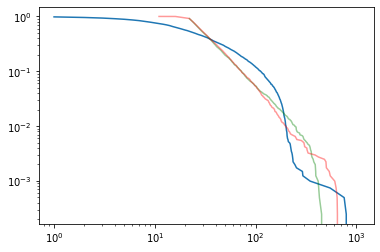

In [106]:
# On a log-log scale, both HK and BA are reasonable models for the tail behavior.

(1-cdf_fb).plot()
(1-cdf_ba).plot(color='g', alpha=0.4)
(1-cdf_hk).plot(color='r', alpha=0.4)
plt.xscale('log')
plt.yscale('log')
plt.loc='upper right'

In [107]:
# Exercise 4.3

In [108]:
# The following function reads the file and builds the graph.

import gzip

def read_actor_network(filename, n=None):
    """Reads graph data from a file.
    
    filename: string
    n: int, number of lines to read (default is all)
    """
    G = nx.Graph()
    with gzip.open(filename) as f:
        for i, line in enumerate(f):
            nodes = [int(x) for x in line.split()]
            G.add_edges_from(all_pairs(nodes))
            if n and i >= n:
                break
    return G

def all_pairs(nodes):
    """Generates all pairs of nodes."""
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

In [111]:
actors = read_actor_network('actor.dat.gz', n=10000)

In [112]:
# As expected, the average clustering is high.

average_clustering(actors, trials=1000)

0.724

In [114]:
# And in the largest connected component, the average path length is low.

for nodes in nx.connected_components(actors):
    if len(nodes) > 100:
        print(len(nodes), estimate_path_length(actors, nodes))

17270 3.574


In [116]:
# Here are the mean and standard deviation of degree:

ds = degrees(actors)
np.mean(ds), np.std(ds)

(38.35541619156214, 61.53610074821354)

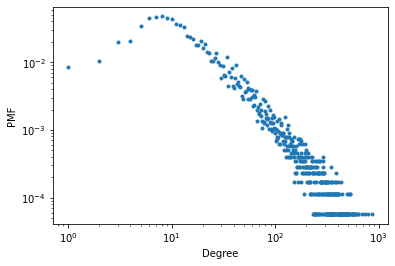

In [117]:
# And the PMF of degree in a log-log scale.

pmf = Pmf.from_seq(ds, name='actors')
pmf.plot(**options, xlabel='Degree', ylabel='PMF')
plt.xscale('log')
plt.yscale('log')

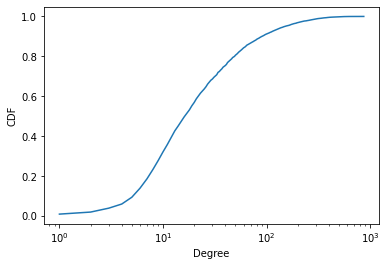

In [118]:
# Here's the CDF on a log scale.

cdf = Cdf.from_seq(ds, name='actors')
cdf.plot(xlabel='Degree', ylabel='CDF')
plt.xscale('log')

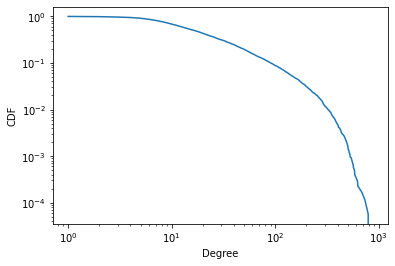

In [119]:
# The CDF on a log-log scale.

(1-cdf).plot(xlabel='Degree',ylabel='CDF')
plt.xscale('log')
plt.yscale('log')

In [120]:
# The PMF on a log-log scale suggests a power law.

# The CDF on a log-x scale looks like a lognormal distribution, possibly skewed to the right.

# The CDF on a log-log scale does not have the straight line behavior we expect from a power law,
# but it is consistent with a heavy-tailed distribution.